In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
from itertools import combinations
from scipy.stats import mannwhitneyu

In [23]:
df = pd.read_excel('C:/Users/Administrador/OneDrive\Ambiente de Trabalho/Article_Organize_Data/Clean_Single_Data.xlsx')
df

,No Amostra,Data de colheita,Zona de Produção,Espécie,Cd (mg/kg),Hg (mg/kg),Pb (mg/kg),E.coli (NMP/100G),Day,Month,Year
0,362/21,13/04/2021,ETJ,Pé-de-burro,0.24,0.028,0.24,NaN,13,Apr,2021
1,363/21,13/04/2021,ESD1,Ostra-portuguesa,0.50,0.026,0.12,NaN,13,Apr,2021
2,366/21,13/04/2021,RIAV4,Ostra-japonesa,0.18,0.045,0.14,NaN,13,Apr,2021
3,369/21,19/04/2021,LOB,Amêijoa-relógio,0.09,0.011,0.70,NaN,19,Apr,2021
4,376/21,20/04/2021,L7c2,Amêijoa-boa,0.06,0.030,0.02,NaN,20,Apr,2021
...,...,...,...,...,...,...,...,...,...,...,...
1812,1044/22,28/09/2022,RIAV1,Longueirão,0.13,0.016,0.14,20.0,28,Sept,2022
1813,1045/22,28/09/2022,RIAV1,Berbigão,0.16,0.030,0.10,20.0,28,Sept,2022
1814,1046/22,28/09/2022,RIAV1,Amêijoa-japonesa,0.26,0.017,0.06,NaN,28,Sept,2022
1815,1047/22,28/09/2022,L1,Mexilhão,0.28,0.012,0.18,NaN,28,Sept,2022


In [24]:
df['Espécie'].value_counts()

Ostra-japonesa      259
Mexilhão            245
Amêijoa-boa         227
Ostra-portuguesa    214
Amêijoa-japonesa    163
Lambujinha          151
Berbigão            148
Longueirão           83
Amêijoa-branca       79
Amêijoa-macha        56
Conquilha            56
Amêijola             46
Ostra-plana          31
Pé-de-burro          27
Amêijoa-relógio      10
Ostra                 9
Vieira                6
Amêijoa-cão           5
Taralhão              2
Name: Espécie, dtype: int64

In [26]:
# Let´s select only the species we want to analyse
df = df[(df['Espécie']=='Ostra-japonesa')|
  (df['Espécie']=='Amêijoa-boa') |
  (df['Espécie']=='Ostra-portuguesa') |
  (df['Espécie']=='Amêijoa-japonesa') |
  (df['Espécie']=='Amêijoa-branca') | 
  (df['Espécie']=='Amêijoa-macha') |
  (df['Espécie']=='Ostra-plana') |
  (df['Espécie']=='Amêijoa-relógio') |
  (df['Espécie']=='Amêijoa-cão')]

df['Espécie'].value_counts()

Ostra-japonesa      259
Amêijoa-boa         227
Ostra-portuguesa    214
Amêijoa-japonesa    163
Amêijoa-branca       79
Amêijoa-macha        56
Ostra-plana          31
Amêijoa-relógio      10
Amêijoa-cão           5
Name: Espécie, dtype: int64

# Mann-Whitney U Test

Is there a difference in between the distributions of two groups?

_[Pb] by Specie_

In [27]:
for species, species_data in df.groupby('Espécie'):
    sns.displot(species_data['Pb (mg/kg)'],kind='kde')
    plt.title(species)

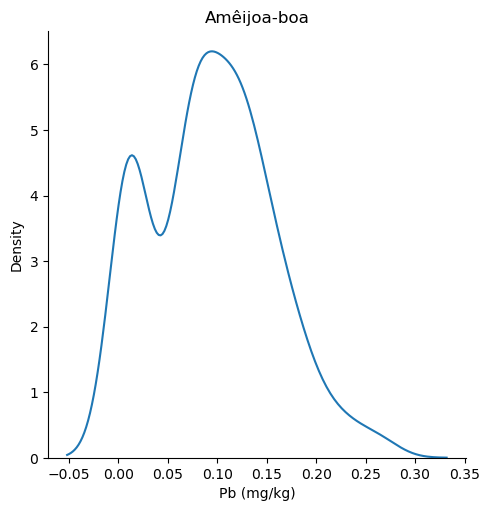

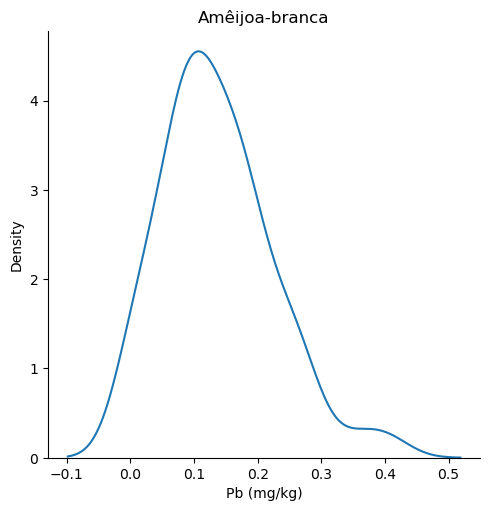

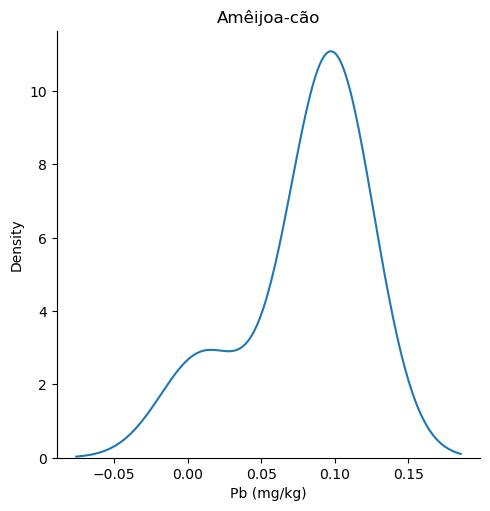

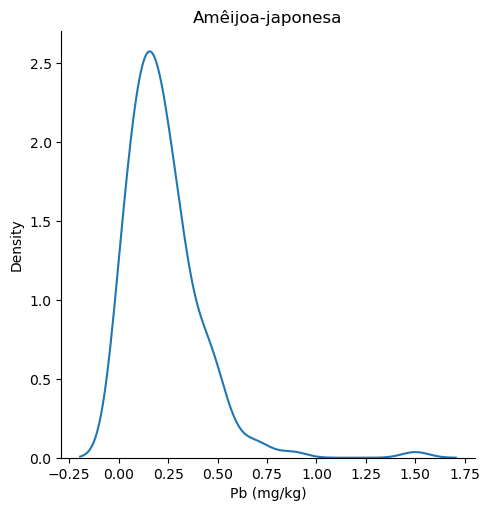

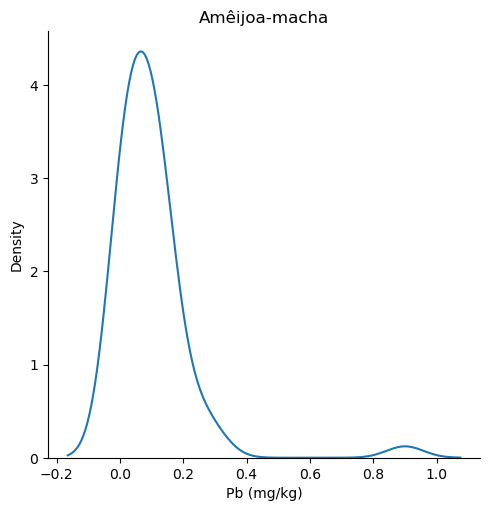

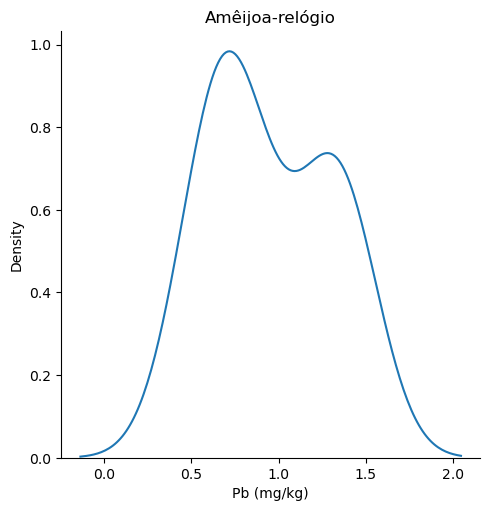

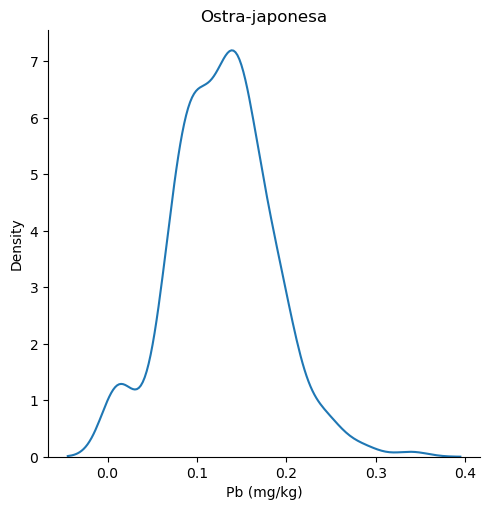

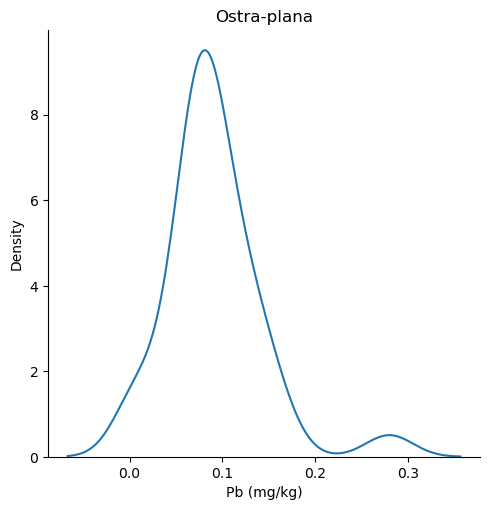

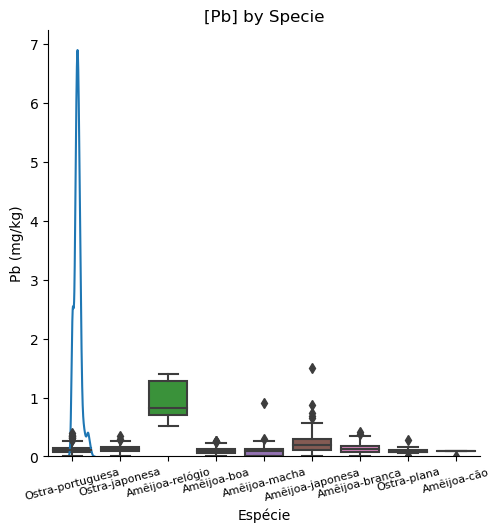

In [28]:
sns.boxplot(df['Espécie'],df['Pb (mg/kg)'])
plt.title('[Pb] by Specie')
plt.xticks(fontsize=8,rotation=15)
plt.show()

In [29]:
df.groupby('Espécie').agg(N_Samples=('Espécie','count'),
                         Median=('Pb (mg/kg)','median'))

,N_Samples,Median
Espécie,,
Amêijoa-boa,227,0.090
Amêijoa-branca,79,0.120
Amêijoa-cão,5,0.100
Amêijoa-japonesa,163,0.190
Amêijoa-macha,56,0.090
Amêijoa-relógio,10,0.825
Ostra-japonesa,259,0.130
Ostra-plana,31,0.080
Ostra-portuguesa,214,0.110


__Kruskal-Wallis__

In [43]:
# Sample data for each group (replace this with your own data)
aj_boa = df[df['Espécie'] == 'Amêijoa-boa']['Pb (mg/kg)'].values
aj_j = df[df['Espécie'] == 'Amêijoa-japonesa']['Pb (mg/kg)'].values
ostra_tuga = df[df['Espécie'] == 'Ostra-portuguesa']['Pb (mg/kg)'].values
ostra_japo = df[df['Espécie'] == 'Ostra-japonesa']['Pb (mg/kg)'].values
aj_branca = df[df['Espécie']=='Amêijoa-branca']['Pb (mg/kg)'].values 
aj_macha = df[df['Espécie']=='Amêijoa-macha']['Pb (mg/kg)'].values 
ostra_plana = df[df['Espécie']=='Ostra-plana']['Pb (mg/kg)'].values 
aj_relogio = df[df['Espécie']=='Amêijoa-relógio']['Pb (mg/kg)'].values 
aj_cão = df[df['Espécie']=='Amêijoa-cão']['Pb (mg/kg)'].values 

In [45]:
# Perform Kruskal-Wallis test --- Ostras
statistic, p_value = stats.kruskal(ostra_tuga, ostra_japo,aj_branca, ostra_plana)

# Output the results
print("Kruskal-Wallis Test Statistic:", statistic)
print("P-value:", p_value)

# Check the significance level (e.g., alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")

Kruskal-Wallis Test Statistic: 22.128188514023332
P-value: 6.134503534592714e-05
Reject the null hypothesis. There is a significant difference between the groups.


In [49]:
# Perform Kruskal-Wallis test --- Amêijoas
statistic, p_value = stats.kruskal(aj_boa, aj_j, aj_branca,aj_macha, aj_relogio, aj_cão)

# Output the results
print("Kruskal-Wallis Test Statistic:", statistic)
print("P-value:", p_value)

# Check the significance level (e.g., alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")

Kruskal-Wallis Test Statistic: 117.45127627941163
P-value: 1.0875013713670805e-23
Reject the null hypothesis. There is a significant difference between the groups.


__Perform Multiple Mann-Whitney U test__

In [51]:
# Data for each group --- Ostras
group_data = {
    'Ostra-portuguesa': df[df['Espécie'] == 'Ostra-portuguesa']['Pb (mg/kg)'].values,
    'Ostra-japonesa': df[df['Espécie'] == 'Ostra-japonesa']['Pb (mg/kg)'].values,
    'Ostra-plana': df[df['Espécie'] == 'Ostra-plana']['Pb (mg/kg)'].values,
}

# List of all group names
all_groups = list(group_data.keys())

# Perform pairwise Mann-Whitney U tests
for group_pair in combinations(all_groups, 2):
    group1_name, group2_name = group_pair
    group1_data, group2_data = group_data[group1_name], group_data[group2_name]

    statistic, p_value = mannwhitneyu(group1_data, group2_data, alternative='two-sided')

    # Output the results for each pairwise comparison
    print("Mann-Whitney U Test:")
    print(f"Comparison between Group {group1_name} and Group {group2_name}")
    print("Statistic:", statistic)
    print("p-value:", p_value)

    # Check for significance at a specific alpha level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the groups.")
    print()

Mann-Whitney U Test:
Comparison between Group Ostra-portuguesa and Group Ostra-japonesa
Statistic: 23110.5
p-value: 0.0018307148464136026
Reject the null hypothesis: There is a significant difference between the groups.

Mann-Whitney U Test:
Comparison between Group Ostra-portuguesa and Group Ostra-plana
Statistic: 4236.0
p-value: 0.012513070528090876
Reject the null hypothesis: There is a significant difference between the groups.

Mann-Whitney U Test:
Comparison between Group Ostra-japonesa and Group Ostra-plana
Statistic: 5871.5
p-value: 2.488533088133365e-05
Reject the null hypothesis: There is a significant difference between the groups.



In [53]:
# Data for each group --- Amêijoas
group_data = {
    'Amêijoa-boa': df[df['Espécie'] == 'Amêijoa-boa']['Pb (mg/kg)'].values,
    'Amêijoa-japonesa': df[df['Espécie'] == 'Amêijoa-japonesa']['Pb (mg/kg)'].values,
    'Amêijoa-branca': df[df['Espécie'] == 'Amêijoa-branca']['Pb (mg/kg)'].values,
    'Amêijoa-macha': df[df['Espécie'] == 'Amêijoa-macha']['Pb (mg/kg)'].values,
    'Amêijoa-relógio': df[df['Espécie'] == 'Amêijoa-relógio']['Pb (mg/kg)'].values,
    'Amêijoa-cão': df[df['Espécie'] == 'Amêijoa-cão']['Pb (mg/kg)'].values
}

# List of all group names
all_groups = list(group_data.keys())

# Perform pairwise Mann-Whitney U tests
for group_pair in combinations(all_groups, 2):
    group1_name, group2_name = group_pair
    group1_data, group2_data = group_data[group1_name], group_data[group2_name]

    statistic, p_value = mannwhitneyu(group1_data, group2_data, alternative='two-sided')

    # Output the results for each pairwise comparison
    print("Mann-Whitney U Test:")
    print(f"Comparison between Group {group1_name} and Group {group2_name}")
    print("Statistic:", statistic)
    print("p-value:", p_value)

    # Check for significance at a specific alpha level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the groups.")
    print()


Mann-Whitney U Test:
Comparison between Group Amêijoa-boa and Group Amêijoa-japonesa
Statistic: 8937.0
p-value: 2.5213127430788458e-18
Reject the null hypothesis: There is a significant difference between the groups.

Mann-Whitney U Test:
Comparison between Group Amêijoa-boa and Group Amêijoa-branca
Statistic: 6535.0
p-value: 0.00031574765512473247
Reject the null hypothesis: There is a significant difference between the groups.

Mann-Whitney U Test:
Comparison between Group Amêijoa-boa and Group Amêijoa-macha
Statistic: 7044.0
p-value: 0.20732613212420647
Fail to reject the null hypothesis: There is no significant difference between the groups.

Mann-Whitney U Test:
Comparison between Group Amêijoa-boa and Group Amêijoa-relógio
Statistic: 0.0
p-value: 7.902554006391682e-08
Reject the null hypothesis: There is a significant difference between the groups.

Mann-Whitney U Test:
Comparison between Group Amêijoa-boa and Group Amêijoa-cão
Statistic: 639.5
p-value: 0.6284146940096441
Fail to

# Conclusions:
* The Mann-Whitney U Test shows that there is siginificant diffrences between [pb] distribution among species.